<a href="https://colab.research.google.com/github/AnthonySunYi/Verilog_DSL/blob/main/Mid_Term_Practical_Hands_On.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install git+https://github.com/pe8sutd/eda4u &> /dev/null
!git clone https://github.com/pe8sutd/eda4u &> /dev/null
!apt-get install iverilog -y
%load_ext plugin

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Suggested packages:
  gtkwave
The following NEW packages will be installed:
  iverilog
0 upgraded, 1 newly installed, 0 to remove and 29 not upgraded.
Need to get 2,130 kB of archives.
After this operation, 6,749 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 iverilog amd64 11.0-1.1 [2,130 kB]
Fetched 2,130 kB in 2s (919 kB/s)
Selecting previously unselected package iverilog.
(Reading database ... 124947 files and directories currently installed.)
Preparing to unpack .../iverilog_11.0-1.1_amd64.deb ...
Unpacking iverilog (11.0-1.1) ...
Setting up iverilog (11.0-1.1) ...
Processing triggers for man-db (2.10.2-1) ...
The plugin extension is already loaded. To reload it, use:
  %reload_ext plugin


# Help From ChatGPT

In [52]:
%%verilog
module decade_counter (
    input clk,              // Clock signal
    input rst,              // Asynchronous active-low reset signal
    output reg [4:0] count, // 5-bit counter output
    output reg ten          // Asserted when count equals 18 (5'b10010)
);
    always @(posedge clk or negedge rst) begin
        if (!rst) begin
            count <= 5'b00000; // Reset count
            ten   <= 1'b0;     // Reset 'ten' signal
        end else begin
            if (count == 5'b10011) // When count reaches 19, roll over to 0
                count <= 5'b00000;
            else
                count <= count + 1'b1;

            // Fix: 'ten' is now updated based on the next clock cycle's count
            ten <= (count == 5'b10001); // At count = 17, next cycle will be 18
        end
    end
endmodule

module testbench;
    reg clk;
    reg rst;
    wire [4:0] count;
    wire ten;

    // Instantiate the decade_counter module
    decade_counter uut (
        .clk(clk),
        .rst(rst),
        .count(count),
        .ten(ten)
    );

    // Clock generation: Create a clock with a period of 2 time units.
    initial clk = 0;
    always #1 clk = ~clk;

    // Simulation and test stimulus
    initial begin
        // Dump waveform data for viewing in %%waveform.
        $dumpfile("waveform.vcd");
        $dumpvars(0, testbench);

        // Monitor signal values in the simulation log
        $monitor("Time: %0d | CLK=%b | RST=%b | COUNT=%b | TEN=%b",
                 $time, clk, rst, count, ten);

        // ----- Test Case 1: Initial Reset Test -----
        rst = 0; // Assert reset (active low)
        #2;      // Allow time for reset

        rst = 1; // Release reset

        // ----- Test Case 2: Full Counting Cycle -----
        #40; // Let the counter run through a full cycle (0 to 19)

        // ----- Test Case 3: Mid-cycle Reset Test -----
        rst = 0; // Reset in the middle
        #2;      // Wait for reset to take effect
        rst = 1; // Release reset
        #20;     // Let it count again

        $finish; // End simulation
    end
endmodule


VCD info: dumpfile waveform.vcd opened for output.
Time: 0 | CLK=0 | RST=0 | COUNT=00000 | TEN=0
Time: 1 | CLK=1 | RST=0 | COUNT=00000 | TEN=0
Time: 2 | CLK=0 | RST=1 | COUNT=00000 | TEN=0
Time: 3 | CLK=1 | RST=1 | COUNT=00001 | TEN=0
Time: 4 | CLK=0 | RST=1 | COUNT=00001 | TEN=0
Time: 5 | CLK=1 | RST=1 | COUNT=00010 | TEN=0
Time: 6 | CLK=0 | RST=1 | COUNT=00010 | TEN=0
Time: 7 | CLK=1 | RST=1 | COUNT=00011 | TEN=0
Time: 8 | CLK=0 | RST=1 | COUNT=00011 | TEN=0
Time: 9 | CLK=1 | RST=1 | COUNT=00100 | TEN=0
Time: 10 | CLK=0 | RST=1 | COUNT=00100 | TEN=0
Time: 11 | CLK=1 | RST=1 | COUNT=00101 | TEN=0
Time: 12 | CLK=0 | RST=1 | COUNT=00101 | TEN=0
Time: 13 | CLK=1 | RST=1 | COUNT=00110 | TEN=0
Time: 14 | CLK=0 | RST=1 | COUNT=00110 | TEN=0
Time: 15 | CLK=1 | RST=1 | COUNT=00111 | TEN=0
Time: 16 | CLK=0 | RST=1 | COUNT=00111 | TEN=0
Time: 17 | CLK=1 | RST=1 | COUNT=01000 | TEN=0
Time: 18 | CLK=0 | RST=1 | COUNT=01000 | TEN=0
Time: 19 | CLK=1 | RST=1 | COUNT=01001 | TEN=0
Time: 20 | CLK=0 | 

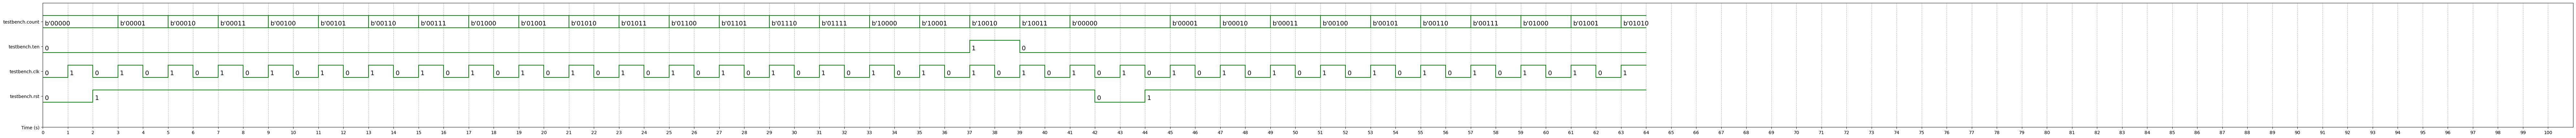

In [53]:
%%waveform waveform.vcd
sign_list = ['testbench.count', 'testbench.ten', 'testbench.clk', 'testbench.rst']
time_begin = 0
time_end = 100
base = 'bin'  # Options: 'bin', 'dec', 'hex', 'octal'


# Generalized testbench that can incorporate Python, C or other coding for the system level design and verification.

In [66]:
%%verilog

module decade_counter (
    input clk,              // Clock signal
    input rst,              // Asynchronous active-low reset signal
    output reg [4:0] count, // 5-bit counter output
    output reg ten          // Asserted when count equals 18 (5'b10010)
);
    always @(posedge clk or negedge rst) begin
        if (!rst) begin
            count <= 5'b00000; // Reset count
            ten   <= 1'b0;     // Reset 'ten' signal
        end else begin
            if (count == 5'b10011) // When count reaches 19, roll over to 0
                count <= 5'b00000;
            else
                count <= count + 1'b1;

            // Fix: 'ten' is now updated based on the next clock cycle's count
            ten <= (count == 5'b10001); // At count = 17, next cycle will be 18
        end
    end
endmodule
module testbench;
    parameter WIDTH = 5;
    parameter MAX_COUNT = 5'b10011;

    reg clk;
    reg rst;
    wire [WIDTH-1:0] count;
    wire ten;

    // Instantiate the decade_counter module
    decade_counter #(.WIDTH(WIDTH)) uut (
        .clk(clk),
        .rst(rst),
        .count(count),
        .ten(ten)
    );

    // Clock generation (parameterized)
    initial clk = 0;
    always #1 clk = ~clk; // Toggle clock every 1 time unit

    // Simulation and test stimulus
    initial begin
        // Dump waveform data for waveform analysis
        $dumpfile("waveform2.vcd");
        $dumpvars(1, testbench);

        // Monitor signal values in the simulation log
        $monitor("Time: %0d | CLK=%b | RST=%b | COUNT=%b | TEN=%b",
                 $time, clk, rst, count, ten);

        // ----- Test Case 1: Periodic Reset Toggle -----
        rst = 0; #5;  // Hold reset low for 5 time units
        rst = 1; #8;  // Release reset, let system run for 8 time units
        rst = 0; #3;  // Assert reset again for 3 time units
        rst = 1; #12; // Release reset again for 12 time units
        rst = 0; #7;  // Toggle reset once more for 7 time units
        rst = 1; #10; // Final release of reset

        // ----- Test Case 2: Full Counting Cycle After Reset -----
        repeat (20) begin
            #2;
            if (count == 5'b10010 && ten != 1) begin
                $display("ERROR: ten should be 1 at count 18!");
                $finish;
            end
        end

        // ----- Test Case 3: Mid-cycle Reset Toggle Again -----
        rst = 0; #4;  // Brief reset
        rst = 1; #15; // Let counter run
        rst = 0; #6;  // Another reset pulse
        rst = 1; #20; // Final normal operation

    // ----------------- SYSTEM-LEVEL INTERFACES -----------------

    // **C Integration (Verilog PLI)**
    `ifdef SYSTEMC_VERIFICATION
        initial begin
            $system("gcc -o verify testbench.c && ./verify");
        end
    `endif

    // **Python Integration (cocotb for verification)**
    `ifdef PYTHON_VERIFICATION
        initial begin
            $system("python3 verify_tb.py");
        end
    `endif

endmodule


The process occurred error, see below the error:

code.v:93: syntax error
I give up.

VCD info: dumpfile waveform2.vcd opened for output.
Time: 0 | CLK=0 | RST=0 | COUNT=00000 | TEN=0
Time: 1 | CLK=1 | RST=0 | COUNT=00000 | TEN=0
Time: 2 | CLK=0 | RST=1 | COUNT=00000 | TEN=0
Time: 3 | CLK=1 | RST=1 | COUNT=00001 | TEN=0
Time: 4 | CLK=0 | RST=1 | COUNT=00001 | TEN=0
Time: 5 | CLK=1 | RST=1 | COUNT=00010 | TEN=0
Time: 6 | CLK=0 | RST=1 | COUNT=00010 | TEN=0
Time: 7 | CLK=1 | RST=1 | COUNT=00011 | TEN=0
Time: 8 | CLK=0 | RST=1 | COUNT=00011 | TEN=0
Time: 9 | CLK=1 | RST=1 | COUNT=00100 | TEN=0
Time: 10 | CLK=0 | RST=1 | COUNT=00100 | TEN=0
Time: 11 | CLK=1 | RST=1 | COUNT=00101 | TEN=0
Time: 12 | CLK=0 | RST=1 | COUNT=00101 | TEN=0
Time: 13 | CLK=1 | RST=1 | COUNT=00110 | TEN=0
Time: 14 | CLK=0 | RST=1 | COUNT=00110 | TEN=0
Time: 15 | CLK=1 | RST=1 | COUNT=00111 | TEN=0
Time: 16 | CLK=0 | RST=1 | COUNT=00111 | TEN=0
Time: 17 | CLK=1 | RST=1 | COUNT=01000 | TEN=0
Time: 18 | CLK=0 | RST=1 |

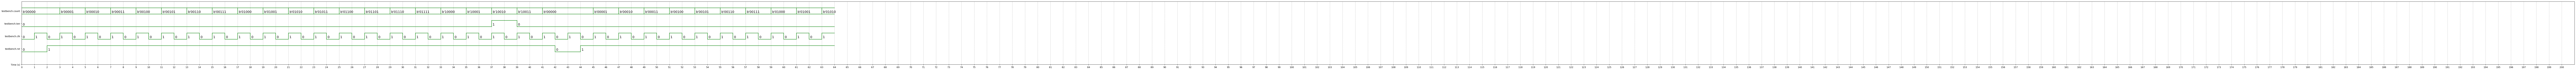

In [63]:
%%waveform waveform2.vcd
sign_list = ['testbench.count', 'testbench.ten', 'testbench.clk', 'testbench.rst']
time_begin = 0
time_end = 200
base = 'bin'  # Options: 'bin', 'dec', 'hex', 'octal'

# Help from Deepseek

In [21]:
%%verilog
// Verilog Module: decade_counter
module decade_counter #(parameter WIDTH = 5) (
    input wire clk,
    input wire rst,
    output reg [WIDTH-1:0] count,
    output reg ten
);

    localparam MAX_COUNT = 5'b10011;

    always @(posedge clk or negedge rst) begin
        if (!rst) begin
            count <= 0;
            ten <= 0;
        end else begin
            if (count == MAX_COUNT) begin
                count <= 0;
                ten <= 0;
            end else begin
                count <= count + 1;
                if (count == 5'b10010)
                    ten <= 1;
                else
                    ten <= 0;
            end
        end
    end

endmodule

// Verilog Testbench: tb_decade_counter
module tb_decade_counter;

    reg clk;
    reg rst;
    wire [4:0] count;
    wire ten;

    decade_counter uut (
        .clk(clk),
        .rst(rst),
        .count(count),
        .ten(ten)
    );

    initial begin
        // Initialize inputs
        clk = 0;
        rst = 0;

        // Monitor signals
        $monitor("Time: %0t | clk: %b | rst: %b | count: %b | ten: %b",
                 $time, clk, rst, count, ten);

        // Test reset
        #10 rst = 1;
        #10 rst = 0;
        #10 rst = 1;

        // Test counting for multiple cycles
        repeat (3) begin
            #200; // Wait for one full count cycle
        end

        $finish;
    end

    always #1 clk = ~clk; // Toggle clock every 1 time unit

    initial begin
        $dumpfile("waveform.vcd");
        $dumpvars(0, tb_decade_counter);
    end

endmodule

VCD info: dumpfile waveform.vcd opened for output.
Time: 0 | clk: 0 | rst: 0 | count: 00000 | ten: 0
Time: 1 | clk: 1 | rst: 0 | count: 00000 | ten: 0
Time: 2 | clk: 0 | rst: 0 | count: 00000 | ten: 0
Time: 3 | clk: 1 | rst: 0 | count: 00000 | ten: 0
Time: 4 | clk: 0 | rst: 0 | count: 00000 | ten: 0
Time: 5 | clk: 1 | rst: 0 | count: 00000 | ten: 0
Time: 6 | clk: 0 | rst: 0 | count: 00000 | ten: 0
Time: 7 | clk: 1 | rst: 0 | count: 00000 | ten: 0
Time: 8 | clk: 0 | rst: 0 | count: 00000 | ten: 0
Time: 9 | clk: 1 | rst: 0 | count: 00000 | ten: 0
Time: 10 | clk: 0 | rst: 1 | count: 00000 | ten: 0
Time: 11 | clk: 1 | rst: 1 | count: 00001 | ten: 0
Time: 12 | clk: 0 | rst: 1 | count: 00001 | ten: 0
Time: 13 | clk: 1 | rst: 1 | count: 00010 | ten: 0
Time: 14 | clk: 0 | rst: 1 | count: 00010 | ten: 0
Time: 15 | clk: 1 | rst: 1 | count: 00011 | ten: 0
Time: 16 | clk: 0 | rst: 1 | count: 00011 | ten: 0
Time: 17 | clk: 1 | rst: 1 | count: 00100 | ten: 0
Time: 18 | clk: 0 | rst: 1 | count: 00100

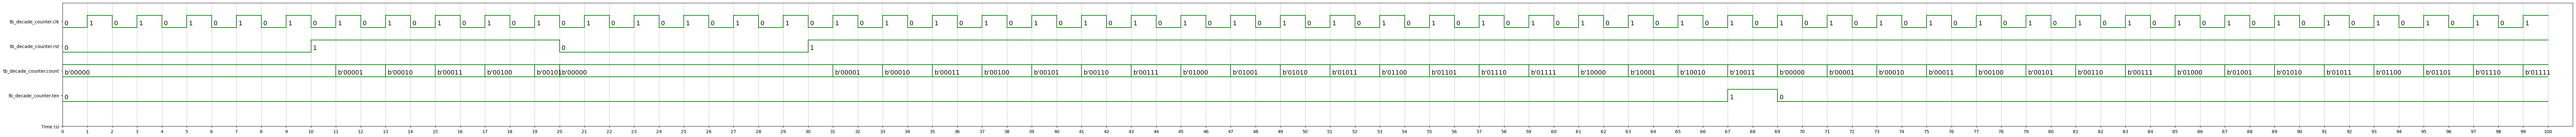

In [27]:
%%waveform waveform.vcd
sign_list = ['tb_decade_counter.clk', 'tb_decade_counter.rst', 'tb_decade_counter.count', 'tb_decade_counter.ten']
time_begin = 0
time_end = 100
base = 'bin'

# With help from Grok

In [39]:
%%verilog
// Main module: decade_counter.v
module decade_counter #(
    parameter MAX_COUNT = 5'b10011,  // Maximum count value (19 in decimal)
    parameter WIDTH = 5,             // Bit width of counter
    parameter TEN_VALUE = 5'b10010   // Value where ten output is active
)(
    input wire clk,                  // Clock input
    input wire rst,                  // Active-low reset
    input wire direction,            // 1 for up, 0 for down counting
    output reg [WIDTH-1:0] count,    // Counter output
    output reg ten                   // Ten indicator output
);

always @(posedge clk or negedge rst) begin
    if (!rst) begin
        // Reset condition
        count <= {WIDTH{1'b0}};
        ten <= 1'b0;
    end
    else begin
        if (direction) begin  // Count up
            if (count == MAX_COUNT)
                count <= {WIDTH{1'b0}};
            else
                count <= count + 1;
        end
        else begin  // Count down
            if (count == {WIDTH{1'b0}})
                count <= MAX_COUNT;
            else
                count <= count - 1;
        end

        // Set ten output
        if (count == TEN_VALUE)
            ten <= 1'b1;
        else
            ten <= 1'b0;
    end
end

endmodule

// Testbench: decade_counter_tb.v
module decade_counter_tb;
    parameter WIDTH = 5;
    parameter CLK_PERIOD = 2;

    reg clk;
    reg rst;
    reg direction;
    wire [WIDTH-1:0] count;
    wire ten;

    decade_counter #(
        .WIDTH(WIDTH)
    ) dut (
        .clk(clk),
        .rst(rst),
        .direction(direction),
        .count(count),
        .ten(ten)
    );

    // Clock generation
    initial begin
        clk = 0;
        forever #(CLK_PERIOD/2) clk = ~clk;
    end

    // Reset toggle pattern - periodic toggling every 10 time units
    initial begin
        rst = 1;          // Initial state
        forever begin
            #10 rst = 0;  // Reset active for 4 time units
            #4 rst = 1;   // Reset inactive for 6 time units
        end
    end

    // Direction control
    initial begin
        direction = 1;    // Start with up counting
        #30 direction = 0; // Switch to down counting after some resets
        #35 direction = 1; // Switch back to up counting
        #35 $finish;      // End simulation after testing both directions
    end

    // Waveform dumping
    initial begin
        $dumpfile("decade_counter.vcd");
        $dumpvars(0, decade_counter_tb);
    end

    // Monitor outputs
    initial begin
        $monitor("Time=%0t rst=%b dir=%b count=%b ten=%b",
                 $time, rst, direction, count, ten);
    end
endmodule

VCD info: dumpfile decade_counter.vcd opened for output.
Time=0 rst=1 dir=1 count=xxxxx ten=x
Time=1 rst=1 dir=1 count=xxxxx ten=0
Time=10 rst=0 dir=1 count=00000 ten=0
Time=14 rst=1 dir=1 count=00000 ten=0
Time=15 rst=1 dir=1 count=00001 ten=0
Time=17 rst=1 dir=1 count=00010 ten=0
Time=19 rst=1 dir=1 count=00011 ten=0
Time=21 rst=1 dir=1 count=00100 ten=0
Time=23 rst=1 dir=1 count=00101 ten=0
Time=24 rst=0 dir=1 count=00000 ten=0
Time=28 rst=1 dir=1 count=00000 ten=0
Time=29 rst=1 dir=1 count=00001 ten=0
Time=30 rst=1 dir=0 count=00001 ten=0
Time=31 rst=1 dir=0 count=00000 ten=0
Time=33 rst=1 dir=0 count=10011 ten=0
Time=35 rst=1 dir=0 count=10010 ten=0
Time=37 rst=1 dir=0 count=10001 ten=1
Time=38 rst=0 dir=0 count=00000 ten=0
Time=42 rst=1 dir=0 count=00000 ten=0
Time=43 rst=1 dir=0 count=10011 ten=0
Time=45 rst=1 dir=0 count=10010 ten=0
Time=47 rst=1 dir=0 count=10001 ten=1
Time=49 rst=1 dir=0 count=10000 ten=0
Time=51 rst=1 dir=0 count=01111 ten=0
Time=52 rst=0 dir=0 count=00000 t

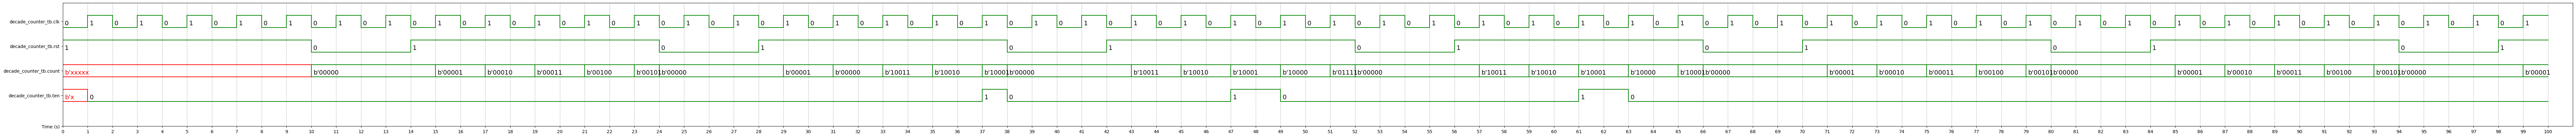

In [40]:
%%waveform decade_counter.vcd
sign_list = ['decade_counter_tb.clk', 'decade_counter_tb.rst', 'decade_counter_tb.count', 'decade_counter_tb.ten']  # Hierarchical paths
time_begin = 0
time_end = 100
base = 'bin'